In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 95% !important; }</style>"))

In [2]:
# testing code source
import sys
sys.path.append("..")

In [3]:
import atlas_rbm.atlas as atlas
import atlas_rbm.export as export
import atlas_rbm.simulation as simulation

In [4]:
network = '../docs/networks/ppi_network3.tsv'
data = atlas.read_network(network)

In [5]:
model = atlas.construct_model_from_interaction_network(network, verbose = False)

In [6]:
# model initial condition
if 'network3' in network:
    simulation.set_initial.prot(model, 'lacZ', 'cyt', 12)
    simulation.set_initial.prot(model, 'lacA', 'cyt', 12)
    simulation.set_initial.prot(model, 'lacY', 'mem', 1)
    
    simulation.set_observable(model, alias = 'lacZ_tetramer',
                              pattern = "prot(name = 'lacZ', up = None, dw = 1) % "+\
                              "prot(name = 'lacZ', up = 1, dw = 2) % "+\
                              "prot(name = 'lacZ', up = 2, dw = 3) % "+\
                              "prot(name = 'lacZ', up = 3, dw = None)")
    simulation.set_observable(model, alias = 'lacA_trimer',
                              pattern = "prot(name = 'lacA', up = None, dw = 1) % "+\
                              "prot(name = 'lacA', up = 1, dw = 2) % "+\
                              "prot(name = 'lacA', up = 2, dw = None)")

In [7]:
bng = '/opt/git-repositories/bionetgen.RuleWorld/bng2/'
kasim = '/opt/git-repositories/KaSim4.Kappa-Dev/'
export.to_bngl(model, 'test.bngl', bng)
export.to_kappa(model, 'test.kappa')

In [8]:
data1 = simulation.ode(model, start = 0, finish = 5, points = 200, path = bng)
data2 = simulation.ssa(model, start = 0, finish = 5, points = 200, n_runs = 20, path = bng)
data3 = simulation.kasim(model, start = 0, finish = 5, points = 200, n_runs = 20, path = kasim)

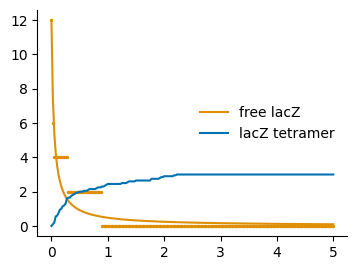

In [9]:
import seaborn
import matplotlib.pyplot as plt

palette = seaborn.color_palette('colorblind')

fig, ax = plt.subplots(1, 1, figsize = (4*1, 3*1), dpi = 100)
simulation.plot.protein(data1, 'lacZ', 'cyt', plt_kws = {'color' : palette[1], 'label' : 'free lacZ'})
simulation.plot.protein(data2['sims'][0], 'lacZ', 'cyt', **{'kind' : 'scatter'}, plt_kws = {'s' : 2, 'color' : palette[1]})
simulation.plot.pattern(data2['avrg'], 'lacZ_tetramer', plt_kws = {'color' : palette[0], 'label' : 'lacZ tetramer'})

seaborn.despine()

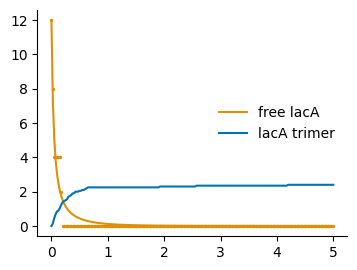

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (4*1, 3*1), dpi = 100)
simulation.plot.protein(data1, 'lacA', 'cyt', plt_kws = {'color' : palette[1], 'label' : 'free lacA'})
simulation.plot.protein(data2['sims'][0], 'lacA', 'cyt', **{'kind' : 'scatter'}, plt_kws = {'s' : 2, 'color' : palette[1]})
simulation.plot.pattern(data2['avrg'], 'lacA_trimer', plt_kws = {'color' : palette[0], 'label' : 'lacA trimer'})

seaborn.despine()